## Voglio cercare di determinare la distribuzione dei miei dati generati

In [102]:
import numpy as np

def asSpherical(xyz):
    #takes list xyz (single coord)
    sph = []
    for i in xyz:
        x       = i[0]
        y       = i[1]
        z       = i[2]
        r1 = np.sqrt(x*x+y*y)
        theta   =  np.arccos(z)*180/ np.pi #to degrees
        phi     =  np.sign(y)*np.arccos(y/r1)*180/ np.pi
        sph.append([theta,phi])
    return sph

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "/home/luca/Uni/VI/Tesi/prog_tesi/Met_1/directions.csv"

direction = pd.read_csv(path).values[:,1:]
sph = np.vstack(asSpherical(direction))
a = np.sort(sph[:,1])
phi = []
for i in a:
    if i>0:
        phi.append(i)
    else:
        phi.append(360+i)
phi = np.sort(phi)
theta = np.sort(sph[:,0])

In [99]:
print(direction)

[[-0.5678431  -0.74005994 -0.36036856]
 [ 0.44356889  0.85731214 -0.26127098]
 [ 0.12888111 -0.80313008 -0.58169729]
 ...
 [-0.12411347 -0.94088144 -0.31517925]
 [ 0.93269945 -0.33891236 -0.12332944]
 [-0.87442139  0.03533216 -0.48387898]]


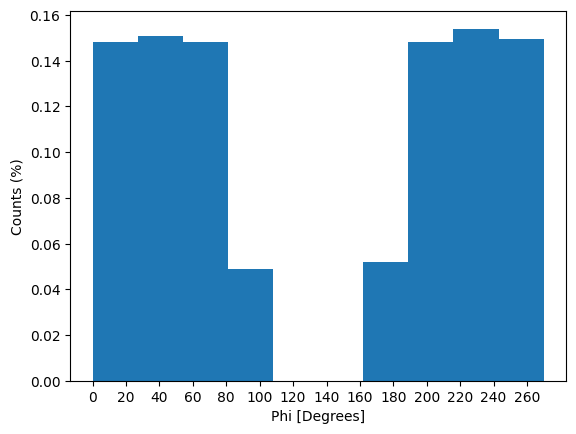

In [112]:
counts, bins = np.histogram(phi)
#plt.stairs(counts/np.sum(counts), bins,)
plt.hist(bins[:-1], bins, weights=counts/np.sum(counts))
plt.xticks(range(0,280,20))
plt.ylabel("Counts (%)")
plt.xlabel("Phi [Degrees]")
plt.show()

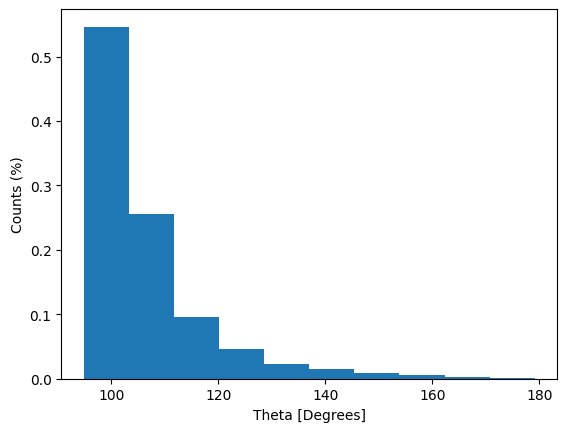

In [95]:
counts, bins = np.histogram(theta)
plt.ylabel("Counts (%)")
plt.xlabel("Theta [Degrees]")

plt.hist(bins[:-1], bins, weights=counts/np.sum(counts))
#plt.grid()
plt.show()

## Ora cerchiamo di valutare quante tracce ho ricostruito

In [28]:
import pandas as pd

names = [f"/home/luca/Uni/VI/Tesi/prog_tesi/Met_2/reco_{i}_10k" for i in range(1,6)]
ricostruiti = []
rico = 0
for name in names:
    df = pd.read_csv(name).groupby(["event","trk_nr"])
    rico = 0
    for [event,trk_nr], group in df:
        arr =  group["event_trk_nr"].values
        if len(set(arr)) == 1:
            rico += 1
    ricostruiti.append(rico)

    

In [5]:
import pandas as pd
import numpy as np

names = [f"/home/luca/Uni/VI/Tesi/prog_tesi/Met_2/reco_{i}_10k" for i in range(1,6)]
ricostruiti = []

for name in names:
    df = pd.read_csv(name)

    # Filtra via le righe con '-1' in event_trk_nr
    df = df[(df['trk_nr'].values!=-1)]

    # Conta quante combinazioni uniche di event_trk_nr per gruppo
    unique_counts = df.groupby(["event", "trk_nr"])["event_trk_nr"].nunique()

    # Un gruppo valido se ha 1 sola stringa ripetuta e nessun -1
    valid = (unique_counts == 1)

    rico = valid.sum()
    ricostruiti.append(rico)

In [4]:
import csv
with open('/home/luca/Uni/VI/Tesi/prog_tesi/Met_2/hough_res.csv', mode='a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow( list(ricostruiti/(10000*np.array([1,2,3,4,5]) )) )

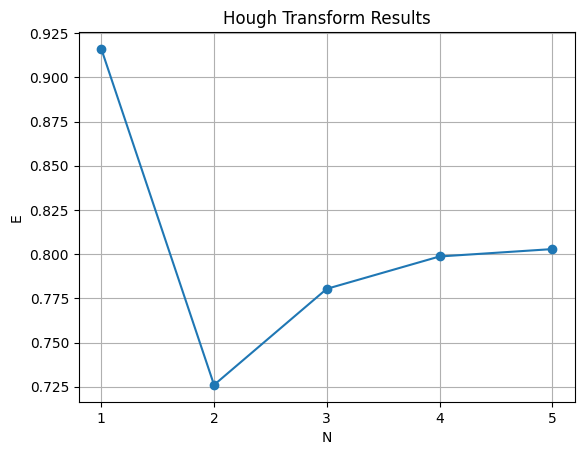

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = [i for i in range(1, 6)]
y = ricostruiti/(10000*np.array([1,2,3,4,5]))
plt.plot(x, y, marker='o')
plt.xlabel("N") #Number of simultaneous hits
plt.ylabel("E") #Efficiency $E = N_{rec}/N_{sim}$
plt.title("Hough Transform Results")
plt.grid(True)
plt.xticks(x)
plt.show()
